--- Starting Task 1: Data Analysis and Preprocessing (eda.ipynb) ---
Datasets loaded successfully from '../data/'!

--- Fraud_Data Overview (Initial Load) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
   user_id          signup_time        purchase_time  purchase_value 

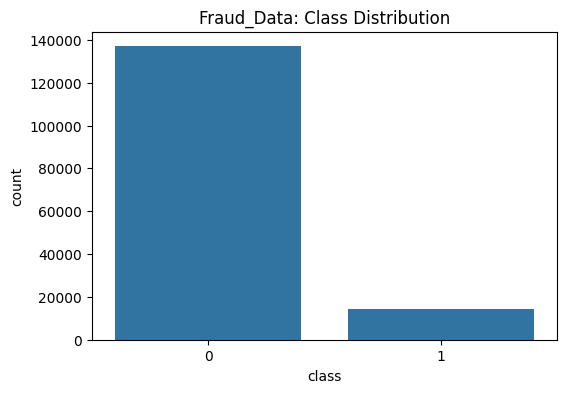

class
0    0.906354
1    0.093646
Name: proportion, dtype: float64

--- Univariate Analysis: Fraud_Data (Age Distribution) ---


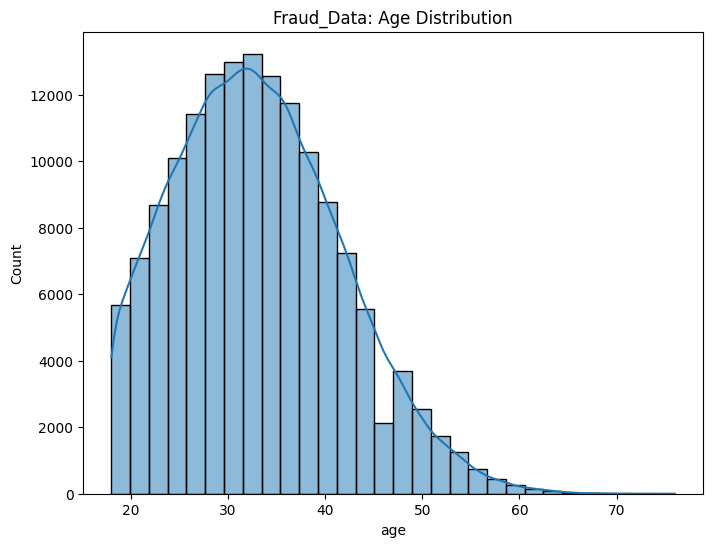


--- Univariate Analysis: Fraud_Data (Source Distribution) ---


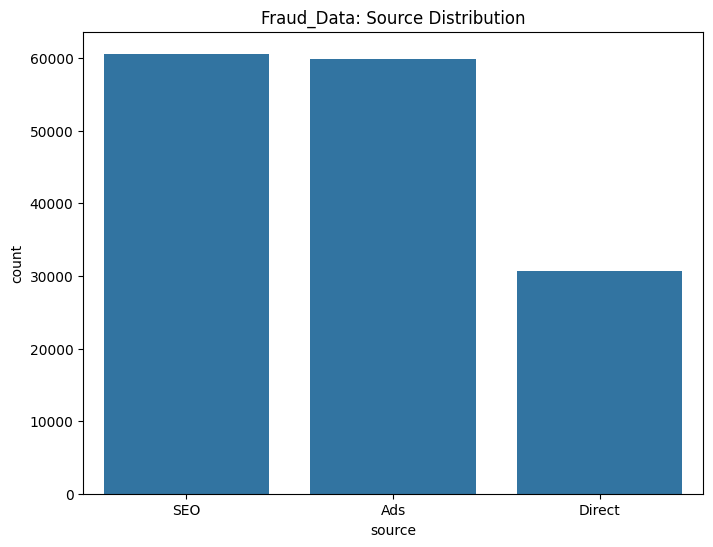


--- Univariate Analysis: CreditCard_Data (Class Distribution) ---


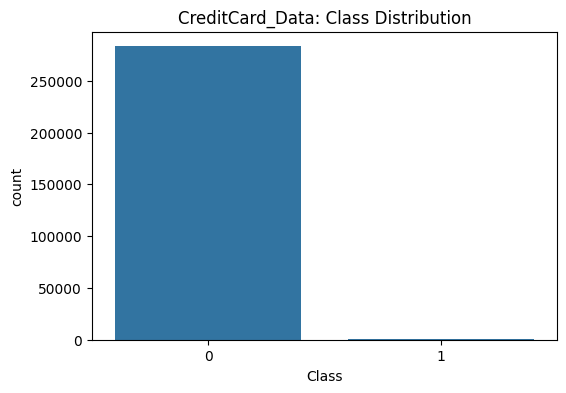

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

--- Univariate Analysis: CreditCard_Data (Amount Distribution) ---


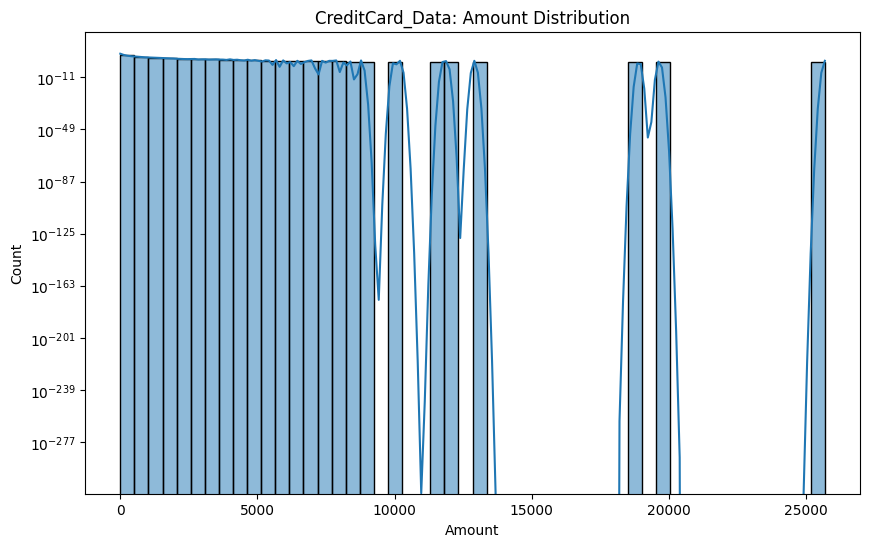


--- Bivariate Analysis: Fraud_Data (Class vs. Age) ---


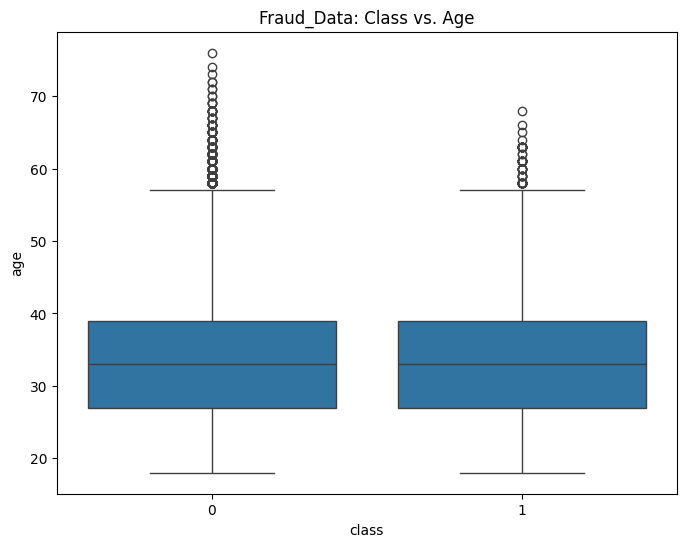


--- Bivariate Analysis: Fraud_Data (Class vs. Source) ---


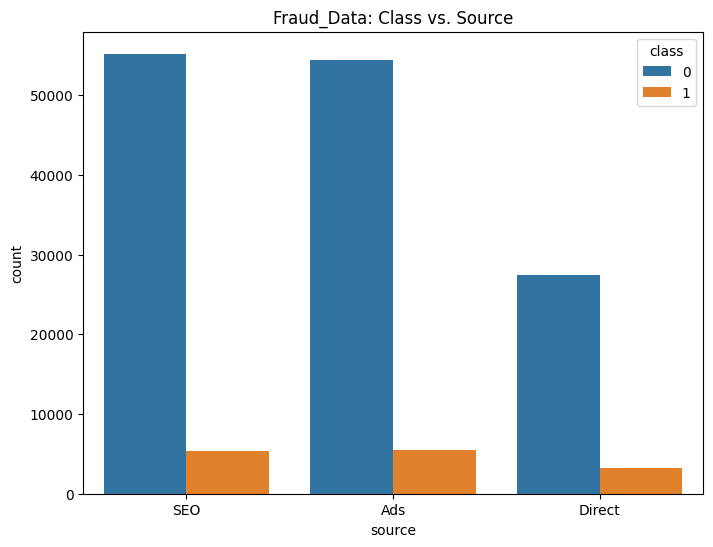


--- Bivariate Analysis: CreditCard_Data (Class vs. Amount) ---


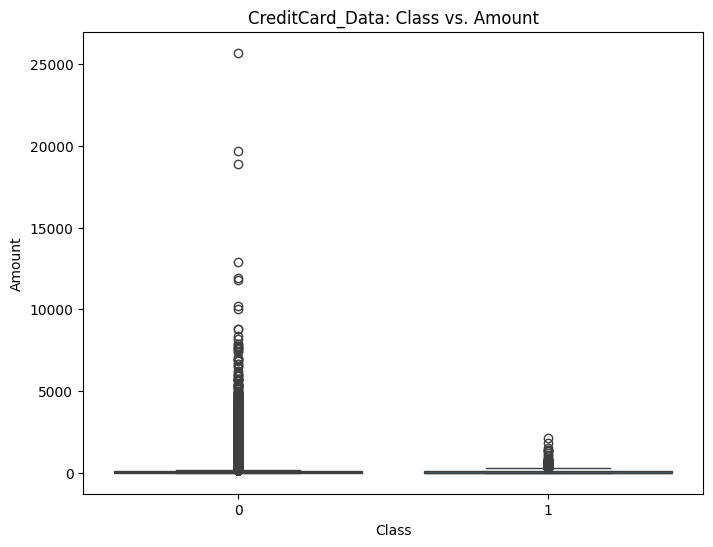


--- Correlation Matrix for CreditCard_Data Features ---


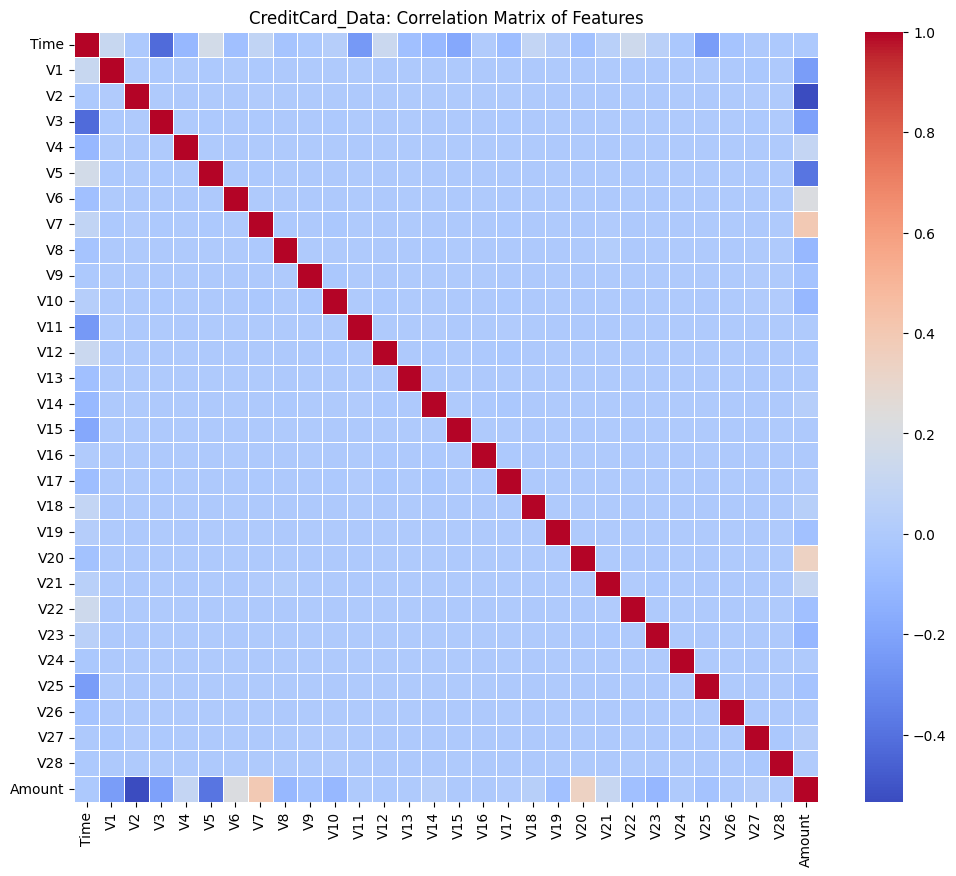


--- Merging Fraud_Data with IpAddress_to_Country for Geolocation Analysis ---
Applying IP to Country mapping for Fraud_Data (this may take a moment)...
IP to Country mapping complete!

--- Distribution of Countries in Fraud_Data ---
country
United States         58049
Unknown               21966
China                 12038
Japan                  7306
United Kingdom         4490
Korea Republic of      4162
Germany                3646
France                 3161
Canada                 2975
Brazil                 2961
Italy                  1944
Australia              1844
Netherlands            1680
Russian Federation     1616
India                  1310
Name: count, dtype: int64

--- Starting Feature Engineering for Fraud_Data ---
Extracting time-based and velocity features for Fraud_Data...
Feature Engineering complete for Fraud_Data.
Fraud_Data after Feature Engineering (first 5 rows):
   user_id         signup_time       purchase_time  purchase_value  \
0   226648 2015-05-12 16:00:3

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os

# Add the project root to the Python path to enable importing from src
# This assumes the notebook is run from the 'notebooks' directory.
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import functions from your new src modules
from src.data_loader import load_fraud_data, load_ip_to_country_data, load_credit_card_data
from src.data_cleaner import clean_fraud_data, clean_ip_to_country_data, clean_credit_card_data
from src.feature_engineer import apply_ip_to_country_mapping, engineer_fraud_features
from src.preprocessing_pipelines import get_fraud_preprocessor, get_credit_card_preprocessor

# Suppress warnings for cleaner output in the notebook
warnings.filterwarnings('ignore')

print("--- Starting Task 1: Data Analysis and Preprocessing (eda.ipynb) ---")

# --- 1. Load Datasets ---
try:
    fraud_data = load_fraud_data()
    ip_to_country = load_ip_to_country_data()
    credit_card_data = load_credit_card_data()
    print("Datasets loaded successfully from '../data/'!")
except Exception as e:
    print(f"Error loading files: {e}")
    raise SystemExit("Data files not found. Please check paths and directory structure.")

# --- Initial Overview (EDA) ---
print("\n--- Fraud_Data Overview (Initial Load) ---")
fraud_data.info()
print(fraud_data.head())
print(fraud_data.describe(include='all'))

print("\n--- IpAddress_to_Country Overview (Initial Load) ---")
ip_to_country.info()
print(ip_to_country.head())
print(ip_to_country.describe(include='all'))

print("\n--- CreditCard_Data Overview (Initial Load) ---")
credit_card_data.info()
print(credit_card_data.head())
print(credit_card_data.describe(include='all'))

# --- 2. Data Cleaning ---
print("\n--- Starting Data Cleaning ---")
fraud_data = clean_fraud_data(fraud_data.copy()) # Use .copy() to avoid SettingWithCopyWarning
ip_to_country = clean_ip_to_country_data(ip_to_country.copy())
credit_card_data = clean_credit_card_data(credit_card_data.copy())
print("Data Cleaning complete!")

# --- 3. EDA (Post-Cleaning) ---
print("\n--- EDA: Fraud_Data (Descriptive Statistics) ---")
print(fraud_data.describe(include='all'))

print("\n--- EDA: CreditCard_Data (Descriptive Statistics) ---")
print(credit_card_data.describe(include='all'))

# --- Univariate Analysis: Fraud_Data ---
print("\n--- Univariate Analysis: Fraud_Data (Class Distribution) ---")
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=fraud_data)
plt.title('Fraud_Data: Class Distribution')
plt.show()
print(fraud_data['class'].value_counts(normalize=True))

print("\n--- Univariate Analysis: Fraud_Data (Age Distribution) ---")
plt.figure(figsize=(8, 6))
sns.histplot(fraud_data['age'], bins=30, kde=True)
plt.title('Fraud_Data: Age Distribution')
plt.show()

print("\n--- Univariate Analysis: Fraud_Data (Source Distribution) ---")
plt.figure(figsize=(8, 6))
sns.countplot(x='source', data=fraud_data)
plt.title('Fraud_Data: Source Distribution')
plt.show()

# --- Univariate Analysis: CreditCard_Data ---
print("\n--- Univariate Analysis: CreditCard_Data (Class Distribution) ---")
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=credit_card_data)
plt.title('CreditCard_Data: Class Distribution')
plt.show()
print(credit_card_data['Class'].value_counts(normalize=True))

print("\n--- Univariate Analysis: CreditCard_Data (Amount Distribution) ---")
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data['Amount'], bins=50, kde=True)
plt.title('CreditCard_Data: Amount Distribution')
plt.yscale('log') # Log scale due to skewed distribution
plt.show()

# --- Bivariate Analysis: Fraud_Data (Class vs. Features) ---
print("\n--- Bivariate Analysis: Fraud_Data (Class vs. Age) ---")
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='age', data=fraud_data)
plt.title('Fraud_Data: Class vs. Age')
plt.show()

print("\n--- Bivariate Analysis: Fraud_Data (Class vs. Source) ---")
plt.figure(figsize=(8, 6))
sns.countplot(x='source', hue='class', data=fraud_data)
plt.title('Fraud_Data: Class vs. Source')
plt.show()

# --- Bivariate Analysis: CreditCard_Data (Class vs. Amount) ---
print("\n--- Bivariate Analysis: CreditCard_Data (Class vs. Amount) ---")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=credit_card_data)
plt.title('CreditCard_Data: Class vs. Amount')
plt.show()

# --- Correlation Matrix for CreditCard_Data Features ---
print("\n--- Correlation Matrix for CreditCard_Data Features ---")
plt.figure(figsize=(12, 10))
sns.heatmap(credit_card_data.drop('Class', axis=1).corr(), cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('CreditCard_Data: Correlation Matrix of Features')
plt.show()

# --- 4. Merge Datasets for Geolocation Analysis ---
print("\n--- Merging Fraud_Data with IpAddress_to_Country for Geolocation Analysis ---")
fraud_data = apply_ip_to_country_mapping(fraud_data.copy(), ip_to_country) # Use .copy()

print("\n--- Distribution of Countries in Fraud_Data ---")
print(fraud_data['country'].value_counts().head(15)) # Top 15 countries by count

# --- 5. Feature Engineering ---
print("\n--- Starting Feature Engineering for Fraud_Data ---")
fraud_data = engineer_fraud_features(fraud_data.copy()) # Use .copy()
print("Fraud_Data after Feature Engineering (first 5 rows):")
print(fraud_data.head())

# --- 6. Data Transformation (Define Pipelines) ---
print("\n--- Defining Preprocessing Pipelines ---")
# Define features for transformation pipelines for Fraud_Data
X_fraud_pre_split = fraud_data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address', 'class'], axis=1)
y_fraud_pre_split = fraud_data['class']

numerical_features_fraud = X_fraud_pre_split.select_dtypes(include=np.number).columns.tolist()
categorical_features_fraud = X_fraud_pre_split.select_dtypes(include='object').columns.tolist()

print(f"\nDEBUG: Fraud_Data numerical features (before pipeline): {numerical_features_fraud}")
print(f"DEBUG: Fraud_Data categorical features (before pipeline): {categorical_features_fraud}")
print(f"DEBUG: Number of numerical features: {len(numerical_features_fraud)}")
print(f"DEBUG: Number of categorical features: {len(categorical_features_fraud)}")

preprocessor_fraud = get_fraud_preprocessor(numerical_features_fraud, categorical_features_fraud)

# Define features for transformation pipelines for CreditCard_Data
X_credit_pre_split = credit_card_data.drop(['Class'], axis=1)
y_credit_pre_split = credit_card_data['Class']

numerical_features_credit = X_credit_pre_split.columns.tolist() # All features are numerical

print(f"\nDEBUG: CreditCard_Data numerical features (before pipeline): {numerical_features_credit}")
print(f"DEBUG: Number of numerical features: {len(numerical_features_credit)}")

preprocessor_credit = get_credit_card_preprocessor(numerical_features_credit)

print("\n--- Task 1: Data Analysis and Preprocessing (eda.ipynb) complete. ---")
